In [1]:
from scipy.stats import hypergeom
import warnings
warnings.filterwarnings("ignore")
import os

# <font color = green>Abrir la Ontología Genética</font>

In [38]:
import pandas as pd
from pandas import DataFrame
import numpy as np

In [3]:
ontologia = pd.read_csv('../descargas/Ontology.csv')
ontologia.head() # el .head() muestra solo la parte inicial del dataframe, puedes quitarlo para ver el dataframe completo

,GO,Term,Aspect
0,GO:0000001,mitochondrion inheritance,P
1,GO:0000002,mitochondrial genome maintenance,P
2,GO:0000003,reproduction,P
3,GO:0000005,obsolete ribosomal chaperone activity,F
4,GO:0000006,high-affinity zinc transmembrane transporter a...,F


## Elegir un Aspecto de la ontología
#### Estas variables son definidas aquí ya que se usarán más adelante

In [4]:
Asp = 'P' # opciones = P, F, C
Asp

'P'

In [5]:
Aspect = 'biological_process' # opciones = biological_process, molecular_function, cellular_component
Aspect

'biological_process'

In [6]:
ASPECT = ontologia[ontologia.Aspect == Asp]
ASPECT.head() # el .head() muestra solo la parte inicial del dataframe, puedes quitarlo para ver el dataframe completo

,GO,Term,Aspect
0,GO:0000001,mitochondrion inheritance,P
1,GO:0000002,mitochondrial genome maintenance,P
2,GO:0000003,reproduction,P
9,GO:0000011,vacuole inheritance,P
10,GO:0000012,single strand break repair,P


# <font color = green>Abrir la Anotacion completa del organismo en estudio, extraida de UniProtGOA/QuickGO</font>
https://www.ebi.ac.uk/GOA/index

## En este caso es la anotación completa de Arabidopsis thaliana
### Click en este link de descarga
https://drive.google.com/uc?export=download&confirm=1o_3&id=1OPlOwz_yZuSHH88Z_KJP_D9fWdvkckQQ

In [7]:
Anotation = pd.read_csv('../descargas/Complete_Annotation_3702_goa', sep = '\t')
Anotation.head() # el .head() muestra solo la parte inicial del dataframe, puedes quitarlo para ver el dataframe completo

,Entry,qualifier,goId,goName,goEvidence,goAspect,evidenceCode,reference,withFrom,taxonId,taxonName,assignedBy,extensions,targetSets,symbol,date,synonyms,name
0,B3H7G2,enables,GO:0003674,NaN,ND,molecular_function,ECO:0000307,GO_REF:0000015,NaN,3702,NaN,TAIR,NaN,NaN,URM1-2,20090508,NaN,NaN
1,B3H7G2,part_of,GO:0005829,NaN,IEA,cellular_component,ECO:0000256,GO_REF:0000104,"[{'connectedXrefs': [{'db': 'UniRule', 'id': '...",3702,NaN,UniProt,NaN,NaN,URM1-2,20200215,NaN,NaN
2,B3H7G2,involved_in,GO:0034227,NaN,IEA,biological_process,ECO:0000256,GO_REF:0000104,"[{'connectedXrefs': [{'db': 'UniRule', 'id': '...",3702,NaN,UniProt,NaN,NaN,URM1-2,20200215,NaN,NaN
3,B3H7G2,involved_in,GO:0032447,NaN,IEA,biological_process,ECO:0000256,GO_REF:0000104,"[{'connectedXrefs': [{'db': 'UniRule', 'id': '...",3702,NaN,UniProt,NaN,NaN,URM1-2,20200215,NaN,NaN
4,B3H7G2,involved_in,GO:0002098,NaN,IEA,biological_process,ECO:0000256,GO_REF:0000104,"[{'connectedXrefs': [{'db': 'UniRule', 'id': '...",3702,NaN,UniProt,NaN,NaN,URM1-2,20200215,NaN,NaN


## Seleccionar solo el aspecto definido en la variable `Aspect`, y al mismo tiempo obtener la lista de asociación, columnas `Entry` y `goId`

In [8]:
associacion = Anotation[Anotation.goAspect == Aspect][['Entry', 'goId']] # la variable Aspect ya fue definida antes y selecciono dos columnas
associacion.columns = ['Entry', 'GO'] # cambiar el nombre de la columna goId a GO
associacion.head() # el .head() muestra solo la parte inicial del dataframe, puedes quitarlo para ver el dataframe completo

,Entry,GO
2,B3H7G2,GO:0034227
3,B3H7G2,GO:0032447
4,B3H7G2,GO:0002098
7,B3H7G2,GO:0008033
8,B3H7G2,GO:0034227


# <font color = green>Abrir el set de genes/proteínas, expresados diferencialmente</font>
## Este dataframe tiene 3 columnas:
`Entry` Identificadores de genes expresados diferencialmente  
`Values` Valores de expresión  
`Background` Datos crudos del transcriptoma  

Estos datos fueron obtenidos a partir de  
https://www.g3journal.org/content/8/9/3093

In [9]:
# importa tu módulo de funciones para descargar el archivo File_5.tsv
import funciones

In [10]:
gene = pd.read_csv('../descargas/File_5.tsv', sep = '\t', names = ['Entry', 'Values', 'Background'])
gene.head() # el .head() muestra solo la parte inicial del dataframe, puedes quitarlo para ver el dataframe completo

,Entry,Values,Background
0,Q9ZVB5,1.309469,Q9ZWT2
1,Q9ZNQ8,1.081158,Q9ZWT1
2,Q9XID9,1.168532,Q9ZWM9
3,Q9XIB2,1.126951,Q9ZWJ9
4,Q9T081,1.118640,Q9ZWI7


In [11]:
"""
número de genes dentro de la lista definida, eliminando los NaN
""" 
total_Gene = len(gene.Entry.drop_duplicates().dropna().tolist())
total_Gene

283

In [12]:
"""
número de genes del background
""" 
total_back = len(gene.Background.drop_duplicates().dropna().tolist())
total_back

17626

## merge de la columna Entry contra associacion para usar lo que está anotado

In [13]:
# Con este merge se logra identificar qué genes tienen GO, para el aspecto definico
gene_anotacion = gene[['Entry']].drop_duplicates().merge(associacion, on = 'Entry').drop_duplicates()
gene_anotacion.head() # el .head() muestra solo la parte inicial del dataframe, quitar para ver el dataframe completo

,Entry,GO
0,Q9ZVB5,GO:0006357
2,Q9ZVB5,GO:0009414
3,Q9ZVB5,GO:0010106
4,Q9ZVB5,GO:0006355
5,Q9ZVB5,GO:0055072


## <font color = purple>Conteo de genes por GO Term dentro de la lista definida</font>

In [14]:
# genes con GO terms, no se toman en cuenta los que no tienen GO
total_Gene_terms_list = len(gene_anotacion.Entry.drop_duplicates().dropna().tolist())
total_Gene_terms_list

222

In [15]:
conteos_list = DataFrame(gene_anotacion.groupby('GO').Entry.size()).reset_index()
conteos_list['tot_list']=total_Gene_terms_list # agrego el número de genes con GO para el aspecto definido
conteos_list.columns = ['GO','list_count', 'tot_list'] # cambio el nombre de columnas
conteos_list.head() # el .head() muestra solo la parte inicial del dataframe, quitar para ver el dataframe completo

,GO,list_count,tot_list
0,GO:0000050,1,222
1,GO:0000272,3,222
2,GO:0000289,2,222
3,GO:0000302,1,222
4,GO:0001666,1,222


## merge de la columna Background contra associacion para usar lo que está anotado

In [16]:
Background = gene[['Background']].drop_duplicates()
Background.columns = ['Entry'] # cambio del nombre de la columna Background a Entry
back_anotacion = Background.merge(associacion, on = 'Entry').drop_duplicates() # merge para asignar GO
back_anotacion.head() # el .head() muestra solo la parte inicial del dataframe, quitar para ver el dataframe completo

,Entry,GO
0,Q9ZWT2,GO:0055114
1,Q9ZWT2,GO:0042742
2,Q9ZWT1,GO:0006546
3,Q9ZWT1,GO:0009107
4,Q9ZWT1,GO:0009249


## <font color = purple>Conteo de genes por GO Term dentro del background</font>

In [17]:
# genes con GO terms, no se toman en cuenta los que no tienen GO
total_back_terms = len(back_anotacion.Entry.drop_duplicates().dropna().tolist())
total_back_terms

13311

In [18]:
conteos_back = DataFrame(back_anotacion.groupby('GO').Entry.size()).reset_index()
conteos_back['tot_list']=total_back_terms # agrego el número de genes con GO para el aspecto definido
conteos_back.columns = ['GO','back_count', 'tot_back'] # cambio el nombre de columnas
conteos_back.head() # el .head() muestra solo la parte inicial del dataframe, quitar para ver el dataframe completo

,GO,back_count,tot_back
0,GO:0000002,3,13311
1,GO:0000003,8,13311
2,GO:0000012,3,13311
3,GO:0000019,1,13311
4,GO:0000023,2,13311


# <font color = green>Empieza el dataframe con valores para test estadístico</font>

In [19]:
estadistica0 = conteos_list.merge(conteos_back, on = 'GO', how = 'left')
estadistica0.head() # el .head() muestra solo la parte inicial del dataframe, quitar para ver el dataframe completo

,GO,list_count,tot_list,back_count,tot_back
0,GO:0000050,1,222,2,13311
1,GO:0000272,3,222,31,13311
2,GO:0000289,2,222,5,13311
3,GO:0000302,1,222,30,13311
4,GO:0001666,1,222,27,13311


## <font color = purple>Bucle para calcular el P value para cada GO term</font>

In [20]:
p_val = []
for index, row in estadistica0.iterrows():
    """
    Función para calcular el P value por cada GO term
    """
    b=hypergeom.sf(row.list_count - 1, row.tot_back, row.back_count, row.tot_list, loc=0)
    p_val.append(b)
estadistica0['P'] = p_val

In [21]:
estadistica0.head() # el .head() muestra solo la parte inicial del dataframe, quitar para ver el dataframe completo

,GO,list_count,tot_list,back_count,tot_back,P
0,GO:0000050,1,222,2,13311,0.033079
1,GO:0000272,3,222,31,13311,0.014587
2,GO:0000289,2,222,5,13311,0.002679
3,GO:0000302,1,222,30,13311,0.396562
4,GO:0001666,1,222,27,13311,0.365266


In [22]:
len(estadistica0)

332

In [23]:
"""
Aquellos GO terms con un gen son removidos ya que no pueden ser sobrerrepresentados
"""
estadistica1 = estadistica0[estadistica0.back_count > 1].reset_index(drop=True)
estadistica1.head() # el .head() muestra solo la parte inicial del dataframe, quitar para ver el dataframe completo

,GO,list_count,tot_list,back_count,tot_back,P
0,GO:0000050,1,222,2,13311,0.033079
1,GO:0000272,3,222,31,13311,0.014587
2,GO:0000289,2,222,5,13311,0.002679
3,GO:0000302,1,222,30,13311,0.396562
4,GO:0001666,1,222,27,13311,0.365266


In [24]:
len(estadistica1)

314

---
# Ajustar el P value usando el método de Benjamini-Hochberg  (FDR)
## Definir el nivel de significancia o alfa puede ser `0.05` ó `0.01`
## Extraer los términos estadísticamente significativos

## <font color = purple>T = True if P <= FDR</font>
## <font color = purple>F = False if P > FDR</font>

<img src="https://raw.githubusercontent.com/Bioinformatica2020/Semana10/master/BENJAMINI_HOCHBERG.png" width = 80%>
    
https://github.com/Bioinformatica2020/Semana10/blob/master/Controlling_the_False_Discovery_Rate.pdf

## <font color = darkorange>Los métodos de corrección de pruebas múltiples reducen sistemáticamente las significancia de cada valo de P</font>
    
## <font color = darkorange>FDR es la probabilidad de que una hipótesis nula sea cierta habiendo sido rechazada por el test estadístico.</font>
---

## <font color = purple>Bucle para calcular el FDR, antes ordenar los valores de P-value de menor a mayor</font>

In [25]:
estadistica2 = estadistica1.sort_values(by ='P',ascending=True).reset_index(drop=True)
estadistica2['Rank'] = estadistica2.index + 1 # agrego una columna con un índice empezando de 1
estadistica2.head() # el .head() muestra solo la parte inicial del dataframe, quitar para ver el dataframe completo

,GO,list_count,tot_list,back_count,tot_back,P,Rank
0,GO:0071456,24,222,169,13311,6.335513e-16,1
1,GO:0009753,15,222,121,13311,1.516139e-09,2
2,GO:0006952,29,222,505,13311,5.689670e-09,3
3,GO:0050832,15,222,156,13311,5.049585e-08,4
4,GO:0009611,14,222,139,13311,7.955308e-08,5


## <font color = purple>Definir un valor de significancia</font>

In [26]:
# 5% de falsos positivos
alfa = 0.05

## <font color = purple>Loop para identificar GO terms significantes</font>

In [27]:
FDR_val=[]
significant = []
for x, y in zip(estadistica2.Rank, estadistica2.P):
    fdr = (x/estadistica2.count()[0]) * alfa
    FDR_val.append(fdr)
    if y <= fdr:
        significant.append('T')
    if y > fdr:
        significant.append('F')
estadistica2['FDR'] = FDR_val
estadistica2['Sig'] = significant

In [28]:
estadistica2.head() # el .head() muestra solo la parte inicial del dataframe, quitar para ver el dataframe completo

,GO,list_count,tot_list,back_count,tot_back,P,Rank,FDR,Sig
0,GO:0071456,24,222,169,13311,6.335513e-16,1,0.000159,T
1,GO:0009753,15,222,121,13311,1.516139e-09,2,0.000318,T
2,GO:0006952,29,222,505,13311,5.689670e-09,3,0.000478,T
3,GO:0050832,15,222,156,13311,5.049585e-08,4,0.000637,T
4,GO:0009611,14,222,139,13311,7.955308e-08,5,0.000796,T


## <font color = purple>Agregar el término (descripción) a cada GO</font>

In [29]:
estadistica3 = estadistica2.merge(ASPECT[['GO','Term']], on = 'GO')
estadistica3.head() # el .head() muestra solo la parte inicial del dataframe, quitar para ver el dataframe completo

,GO,list_count,tot_list,back_count,tot_back,P,Rank,FDR,Sig,Term
0,GO:0071456,24,222,169,13311,6.335513e-16,1,0.000159,T,cellular response to hypoxia
1,GO:0009753,15,222,121,13311,1.516139e-09,2,0.000318,T,response to jasmonic acid
2,GO:0006952,29,222,505,13311,5.689670e-09,3,0.000478,T,defense response
3,GO:0050832,15,222,156,13311,5.049585e-08,4,0.000637,T,defense response to fungus
4,GO:0009611,14,222,139,13311,7.955308e-08,5,0.000796,T,response to wounding


In [30]:
ff = []
for i in estadistica3.GO.drop_duplicates():
    df = gene_anotacion[gene_anotacion.GO == i]
    ff.append([i, ';'.join(df.Entry.tolist())])
enrichment = DataFrame(ff, columns = ['GO','Entry'])

In [31]:
enrichment.head() # el .head() muestra solo la parte inicial del dataframe, quitar para ver el dataframe completo

,GO,Entry
0,GO:0071456,Q8GWC0;Q9SY56;Q9SUU4;Q9SUC6;Q9SB52;Q9LVR5;Q9LT...
1,GO:0009753,Q9M9U2;Q9ZV05;Q9SUR6;Q9SUC6;Q9SK47;Q9SD05;Q9SC...
2,GO:0006952,Q84VQ0;Q06915;O24658;Q9ZW82;Q9ZV05;Q9SUP6;Q9SC...
3,GO:0050832,Q9ZPF5;Q9SVC2;Q9SCS6;Q9SAH7;Q9FKG1;Q9FI23;Q94J...
4,GO:0009611,Q9SUR6;Q9SMP5;Q9SK47;Q9SD05;Q9SAH7;Q9S7L5;Q9LX...


## <font color = purple>Agregar la lista de genes (columna Entry) a cada GO</font>

In [32]:
estadistica4 = estadistica3.merge(enrichment, on = 'GO', how = 'left')
estadistica4.head() # el .head() muestra solo la parte inicial del dataframe, quitar para ver el dataframe completo

,GO,list_count,tot_list,back_count,tot_back,P,Rank,FDR,Sig,Term,Entry
0,GO:0071456,24,222,169,13311,6.335513e-16,1,0.000159,T,cellular response to hypoxia,Q8GWC0;Q9SY56;Q9SUU4;Q9SUC6;Q9SB52;Q9LVR5;Q9LT...
1,GO:0009753,15,222,121,13311,1.516139e-09,2,0.000318,T,response to jasmonic acid,Q9M9U2;Q9ZV05;Q9SUR6;Q9SUC6;Q9SK47;Q9SD05;Q9SC...
2,GO:0006952,29,222,505,13311,5.689670e-09,3,0.000478,T,defense response,Q84VQ0;Q06915;O24658;Q9ZW82;Q9ZV05;Q9SUP6;Q9SC...
3,GO:0050832,15,222,156,13311,5.049585e-08,4,0.000637,T,defense response to fungus,Q9ZPF5;Q9SVC2;Q9SCS6;Q9SAH7;Q9FKG1;Q9FI23;Q94J...
4,GO:0009611,14,222,139,13311,7.955308e-08,5,0.000796,T,response to wounding,Q9SUR6;Q9SMP5;Q9SK47;Q9SD05;Q9SAH7;Q9S7L5;Q9LX...


# <font color = green>Guardar el dataframe final en formato .xls, revisa el excel dentro del directorio</font>

In [33]:
# revisa que tengas un directorio llamado salidas
writer = pd.ExcelWriter('../salidas/Enrichment_'+Asp+'_FDR_'+str(alfa)+'.xlsx')
estadistica4.to_excel(writer,'Significant KEGG Pathways',index=False)
writer.save()

# <font color = green>Visualizaciones</font>

In [34]:
tabla = estadistica4[estadistica4.Sig == 'T'][['Term', 'list_count']]
tabla = tabla.sort_values(by = ['list_count'],ascending=True)
tabla

,Term,list_count
41,floral meristem determinacy,2
16,sesquiterpenoid biosynthetic process,2
15,inositol catabolic process,2
22,alternative respiration,2
23,ornithine metabolic process,2
21,positive regulation of iron ion transport,2
28,proline metabolic process,2
40,cellular heat acclimation,2
32,nuclear-transcribed mRNA poly(A) tail shortening,2
36,indole glucosinolate metabolic process,2


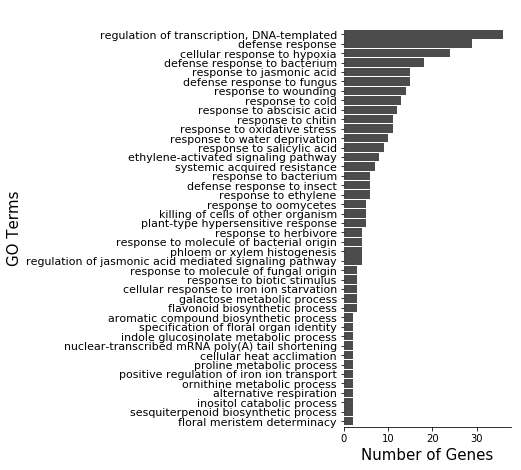

In [35]:
funciones.barras(ancho = 3, alto = 8, ejeX = tabla.Term.tolist(),
       ejeY = tabla.list_count.tolist(),
       barcolor = ['black']*len(tabla.Term.tolist()), titulo = '',
          labelX = 'Number of Genes', labelY = 'GO Terms', salvar = False, nombre = 'plot')

In [36]:
import plotly.express as px
import plotly.graph_objects as go

In [39]:
estadistica4['-log10 Pval'] = -np.log10(estadistica4.P.tolist()) # agrego una columna con el logaritmo negativo del P value
estadistica4['-log10 FDR'] = -np.log10(estadistica4.FDR.tolist())
estadistica4

,GO,list_count,tot_list,back_count,tot_back,P,Rank,FDR,Sig,Term,Entry,-log10 Pval,-log10 FDR
0,GO:0071456,24,222,169,13311,6.335513e-16,1,0.000159,T,cellular response to hypoxia,Q8GWC0;Q9SY56;Q9SUU4;Q9SUC6;Q9SB52;Q9LVR5;Q9LT...,15.198218,3.797960
1,GO:0009753,15,222,121,13311,1.516139e-09,2,0.000318,T,response to jasmonic acid,Q9M9U2;Q9ZV05;Q9SUR6;Q9SUC6;Q9SK47;Q9SD05;Q9SC...,8.819261,3.496930
2,GO:0006952,29,222,505,13311,5.689670e-09,3,0.000478,T,defense response,Q84VQ0;Q06915;O24658;Q9ZW82;Q9ZV05;Q9SUP6;Q9SC...,8.244913,3.320838
3,GO:0050832,15,222,156,13311,5.049585e-08,4,0.000637,T,defense response to fungus,Q9ZPF5;Q9SVC2;Q9SCS6;Q9SAH7;Q9FKG1;Q9FI23;Q94J...,7.296744,3.195900
4,GO:0009611,14,222,139,13311,7.955308e-08,5,0.000796,T,response to wounding,Q9SUR6;Q9SMP5;Q9SK47;Q9SD05;Q9SAH7;Q9S7L5;Q9LX...,7.099343,3.098990
5,GO:0010200,11,222,82,13311,1.074359e-07,6,0.000955,T,response to chitin,Q9SUP6;Q9SAH7;Q9LX93;Q9LTC4;Q8VZ91;Q8VY90;Q8LG...,6.968851,3.019808
6,GO:0042742,18,222,243,13311,1.303763e-07,7,0.001115,T,defense response to bacterium,Q9ZW82;Q9SUP6;Q9SRY5;Q9SAH7;Q9M021;Q9LXM2;Q9LD...,6.884801,2.952862
7,GO:0002213,6,222,17,13311,2.135346e-07,8,0.001274,T,defense response to insect,Q9ZW18;Q9SMP5;Q9S7L5;Q9LXM2;Q67ZU1;O82122,6.670532,2.894870
8,GO:0031640,5,222,14,13311,2.184705e-06,9,0.001433,T,killing of cells of other organism,Q9FI23;Q94JR6;Q56XB0;Q42328;P43082,5.660607,2.843717
9,GO:0009627,7,222,42,13311,5.362370e-06,10,0.001592,T,systemic acquired resistance,Q9M329;Q9ZV52;Q9LEW3;P43082;P33157;P33154;O24603,5.270643,2.797960


In [41]:
print('\n\33[1m\33[7mCircle size = Number of genes')
print('\n\33[1m\33[7mBar scale = -log10(FDR)')
print('\n\33[1m\33[7mMin -log10(P-val) == True |', estadistica4[estadistica4.Sig == 'T']['-log10 Pval'].min())
print('\n\33[1m\33[7mMin -log10(FDR) == True |', estadistica4[estadistica4.Sig == 'T']['-log10 FDR'].min())

fig = go.Figure(data=go.Scatter(x=estadistica4['Rank'],
                                y=estadistica4['-log10 Pval'],
                                mode='markers',
                                marker=dict(
        size=np.array(estadistica4['list_count'])*1.5,
        #color=np.random.randn(500), #set color equal to a variable
        colorscale='Plasma', # one of plotly colorscales
        showscale=True),
                                marker_color=estadistica4['-log10 FDR'],
                                text=estadistica4['Term'])) # hover text goes here

fig.update_layout(title=Aspect)
fig.layout.plot_bgcolor = 'whitesmoke'
fig.update_yaxes(title_text='<b>-Log10(P value)</b>')
fig.update_xaxes(title_text='<b>Rank</b>')
fig.show()


Circle size = Number of genes

Bar scale = -log10(FDR)

Min -log10(P-val) == True | 2.259422039112546

Min -log10(FDR) == True | 2.1747103533392957


In [43]:
import plotly.io
plotly.offline.plot(fig, filename = '../salidas/Enrichment_Abalysis.html', auto_open=False)

'../salidas/Enrichment_Abalysis.html'